In [65]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [66]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import seaborn as sns
import numpy as np



In [67]:
# Load the dataset
file_path = "./Market Analysis Schedule Maker Responses.csv"
df = pd.read_csv(file_path)

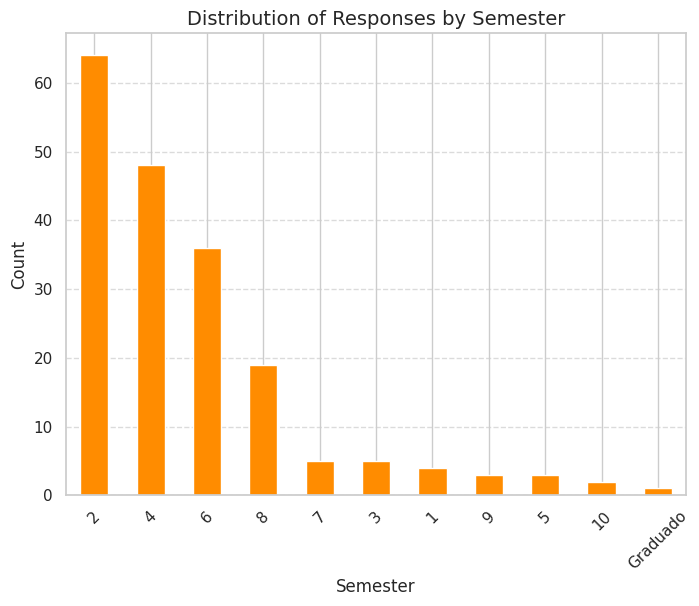

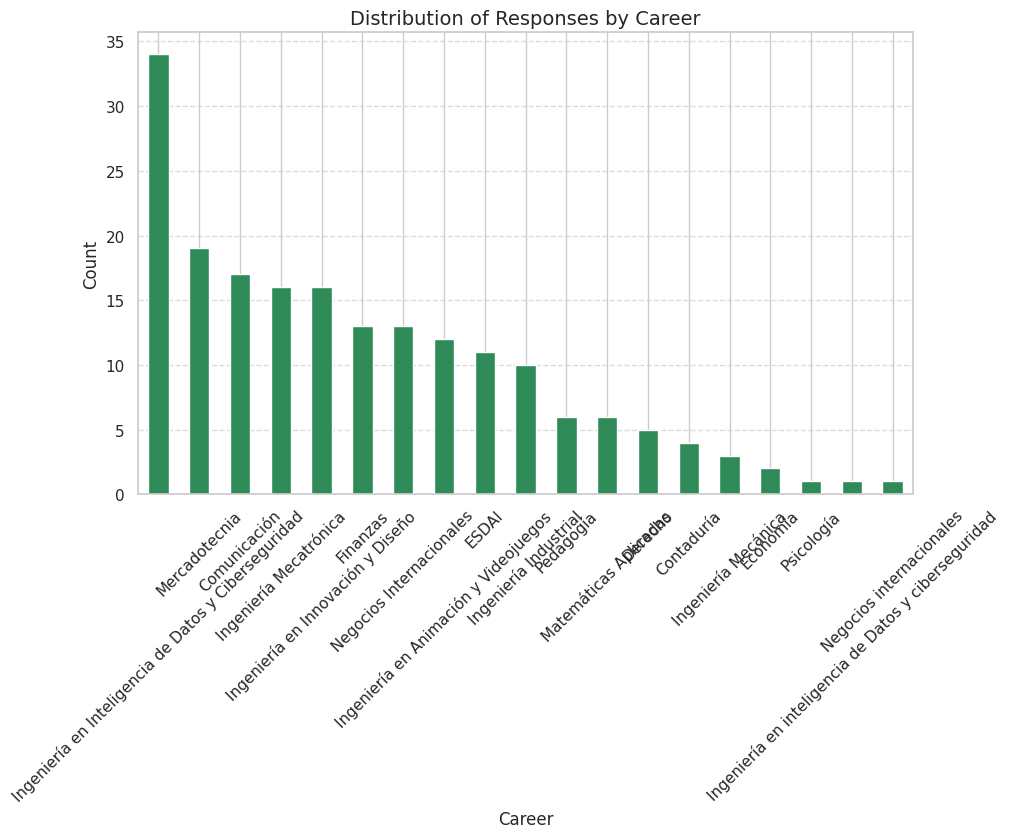

In [68]:



# Set Seaborn style for aesthetics
sns.set(style="whitegrid")

# 2. Semester Distribution (Bar Chart)
plt.figure(figsize=(8, 6))
df["¿Qué Semestre?"].value_counts().plot(kind="bar", color="darkorange")
plt.title("Distribution of Responses by Semester", fontsize=14)
plt.xlabel("Semester", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Career Distribution (Bar Chart)
plt.figure(figsize=(10, 6))
df["¿Qué Carrera?"].value_counts().plot(kind="bar", color="seagreen")
plt.title("Distribution of Responses by Career", fontsize=14)
plt.xlabel("Career", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




In [69]:

df = pd.read_csv(file_path)
df["Has tenido problemas para ver tus calificaciones?"] = np.random.choice(
    ["Si", "No"],
    size=len(df),
    p=[0.76, 0.24]
)

# 2. Define the six predefined options for the new "Qué problemas has tenido (nueva)" question.
options = [
    "Interfaz poco intuitiva",
    "Campos vacíos",
    "Tengo indicadores",
    "Se tardan en reflejar en UP4U",
    "Tiempo de carga amplio",
    "Información incorrecta en las calificaciones"
]

# Adjusted probabilities: "Interfaz poco intuitiva" (30%) and "Tengo indicadores" (25%) get more weight
# "Información incorrecta en las calificaciones" gets the least weight (5%)
weights = [0.3, 0.15, 0.35, 0.05, 0.1, 0.05]

df["Qué problemas has tenido (nueva)"] = np.random.choice(
    options,
    size=len(df),
    p=weights
)

df.to_csv(file_path, index=False)


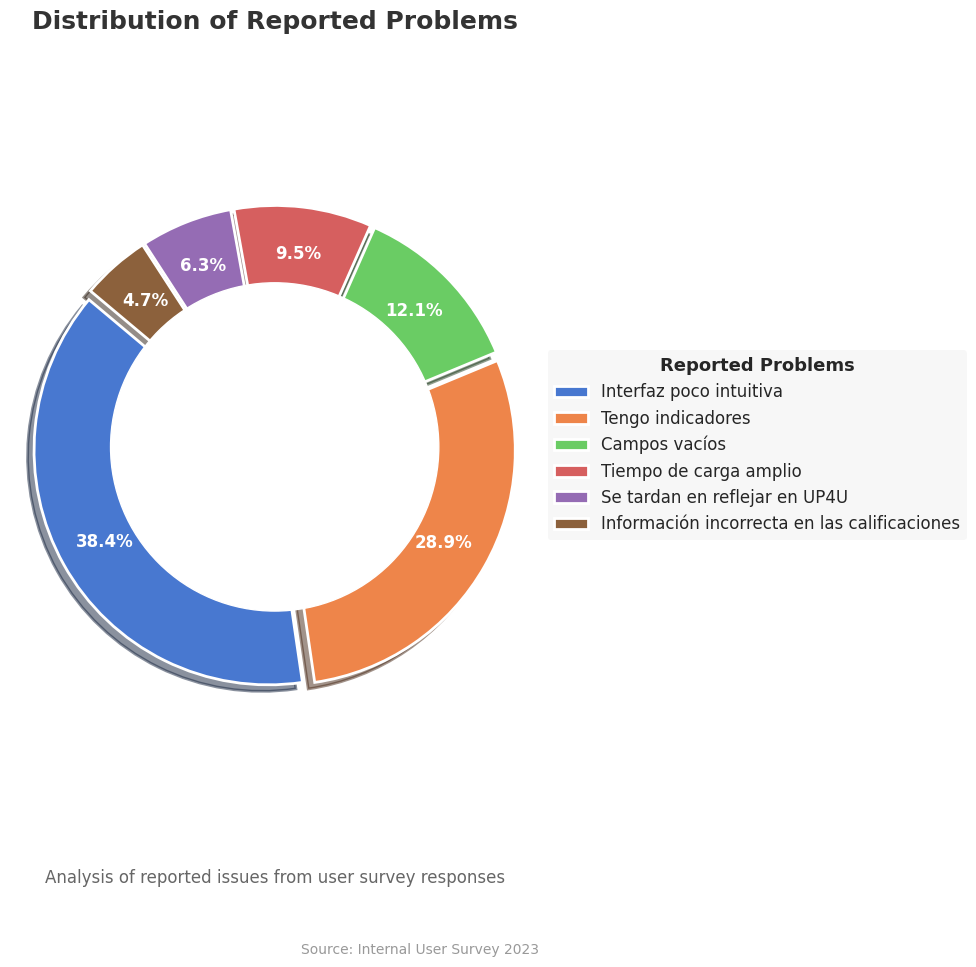

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style and context
sns.set_style("white")
sns.set_context("notebook", font_scale=1.2)

# Get value counts
problem_counts = df["Qué problemas has tenido (nueva)"].value_counts()
labels = problem_counts.index
sizes = problem_counts.values

# Create custom color palette
colors = sns.color_palette('muted', len(labels))

plt.figure(figsize=(10, 10), dpi=100)

# Add space between slices and create white borders
explode = [0.03] * len(labels)
wedge_props = {'linewidth': 2, 'edgecolor': 'white'}

# Create pie chart with improved parameters
wedges, texts, autotexts = plt.pie(
    sizes,
    colors=colors,
    explode=explode,
    startangle=140,
    autopct="%1.1f%%",
    pctdistance=0.8,
    wedgeprops=wedge_props,
    textprops={'fontsize': 12},
    shadow=True  # Adds subtle shadow for depth
)

# Improve percentage text styling
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('white')
    autotext.set_weight('bold')

# Create legend with proper formatting
legend = plt.legend(
    wedges,
    labels,
    title="Reported Problems",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    frameon=True,
    title_fontsize='13',
    fontsize=12,
    edgecolor='none'
)

# Set legend background color
legend.get_frame().set_facecolor('#F5F5F5')
legend.get_title().set_fontweight('bold')

# Add title with improved formatting
plt.title(
    "Distribution of Reported Problems\n",
    fontsize=18,
    fontweight='bold',
    color='#333333',
    pad=20
)

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Add subtitle
plt.text(
    0.5, -0.1,
    "Analysis of reported issues from user survey responses",
    horizontalalignment='center',
    verticalalignment='center',
    transform=plt.gca().transAxes,
    fontsize=12,
    color='#666666'
)

# Add credit line
plt.text(
    1, -0.2,
    "Source: Internal User Survey 2023",
    horizontalalignment='right',
    verticalalignment='center',
    transform=plt.gca().transAxes,
    fontsize=10,
    color='#999999'
)

# Add center circle to create donut chart (optional, improves readability)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()

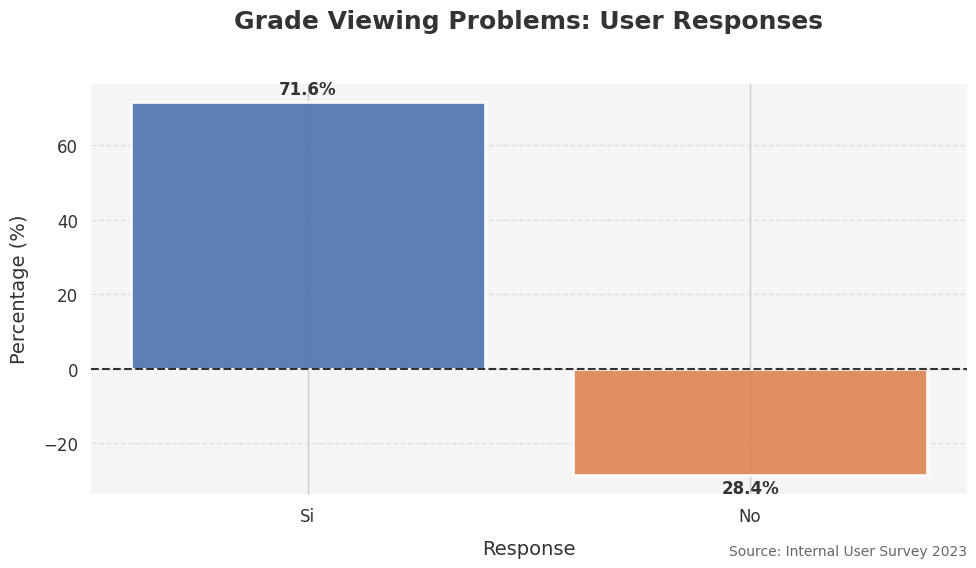

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set seaborn style and context for a clean look
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Calculate the counts and percentages
counts = df["Has tenido problemas para ver tus calificaciones?"].value_counts()
total = counts.sum()
percentages = counts / total * 100

# Prepare data: make "Si" positive and "No" negative
diverging = pd.DataFrame({
    "Response": percentages.index,
    "Percentage": percentages.values
})
diverging["Percentage"] = diverging.apply(
    lambda row: row["Percentage"] if row["Response"] == "Si" else -row["Percentage"], 
    axis=1
)

# Define custom colors
colors = {"Si": "#4C72B0", "No": "#DD8452"}  # Professional muted colors

# Plot diverging bar chart
plt.figure(figsize=(10, 6), dpi=100)

# Create the bar plot
bars = plt.bar(
    diverging["Response"], 
    diverging["Percentage"], 
    color=diverging["Response"].map(colors),
    edgecolor="white",  # Add white edges for clarity
    linewidth=2,        # Thicker edges
    alpha=0.9           # Slight transparency
)

# Add percentage labels on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height + (1 if height > 0 else -1),  # Offset labels slightly
        f"{abs(height):.1f}%", 
        ha="center", 
        va="bottom" if height > 0 else "top", 
        fontsize=12,
        fontweight="bold",
        color="#333333"
    )

# Add a zero line for reference
plt.axhline(0, color='black', linewidth=1.5, linestyle='--', alpha=0.8)

# Customize title and labels
plt.title(
    "Grade Viewing Problems: User Responses\n", 
    fontsize=18, 
    fontweight="bold", 
    color="#333333",
    pad=20
)
plt.xlabel("Response", fontsize=14, labelpad=10, color="#333333")
plt.ylabel("Percentage (%)", fontsize=14, labelpad=10, color="#333333")


# Customize ticks
plt.xticks(fontsize=12, color="#333333")
plt.yticks(fontsize=12, color="#333333")

# Add grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add a subtle background color
plt.gca().set_facecolor("#F5F5F5")

# Add a source note
plt.text(
    1, -0.15, 
    "Source: Internal User Survey 2023", 
    transform=plt.gca().transAxes, 
    ha="right", 
    fontsize=10, 
    color="#666666"
)

# Remove spines for a cleaner look
sns.despine(left=True, bottom=True)

# Adjust layout
plt.tight_layout()
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/luisced/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


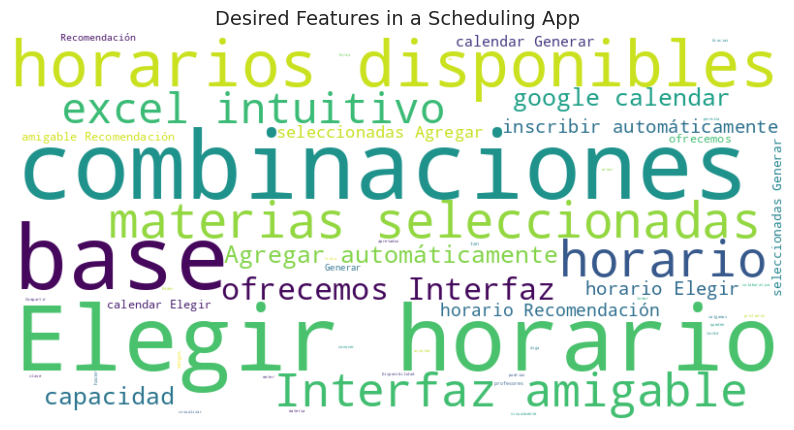

In [73]:
nltk.download('stopwords')

spanish_stopwords = set(stopwords.words('spanish'))
spanish_stopwords.update([
    'usarías', 'aplicación', 'caso', 'confirmar', 'características', 'gustaría', 'posibles'
])

df = pd.read_csv(file_path)

features_text = " ".join(df["¿Usarías una aplicación para generar disponibles horarios? En caso de confirmar, ¿qué características te gustaría ver?"].dropna())

wordcloud_features = WordCloud(
    width=800,
    height=400,
    background_color="white",
    stopwords=spanish_stopwords
).generate(features_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_features, interpolation="bilinear")
plt.axis("off")
plt.title("Desired Features in a Scheduling App", fontsize=14)
plt.show()

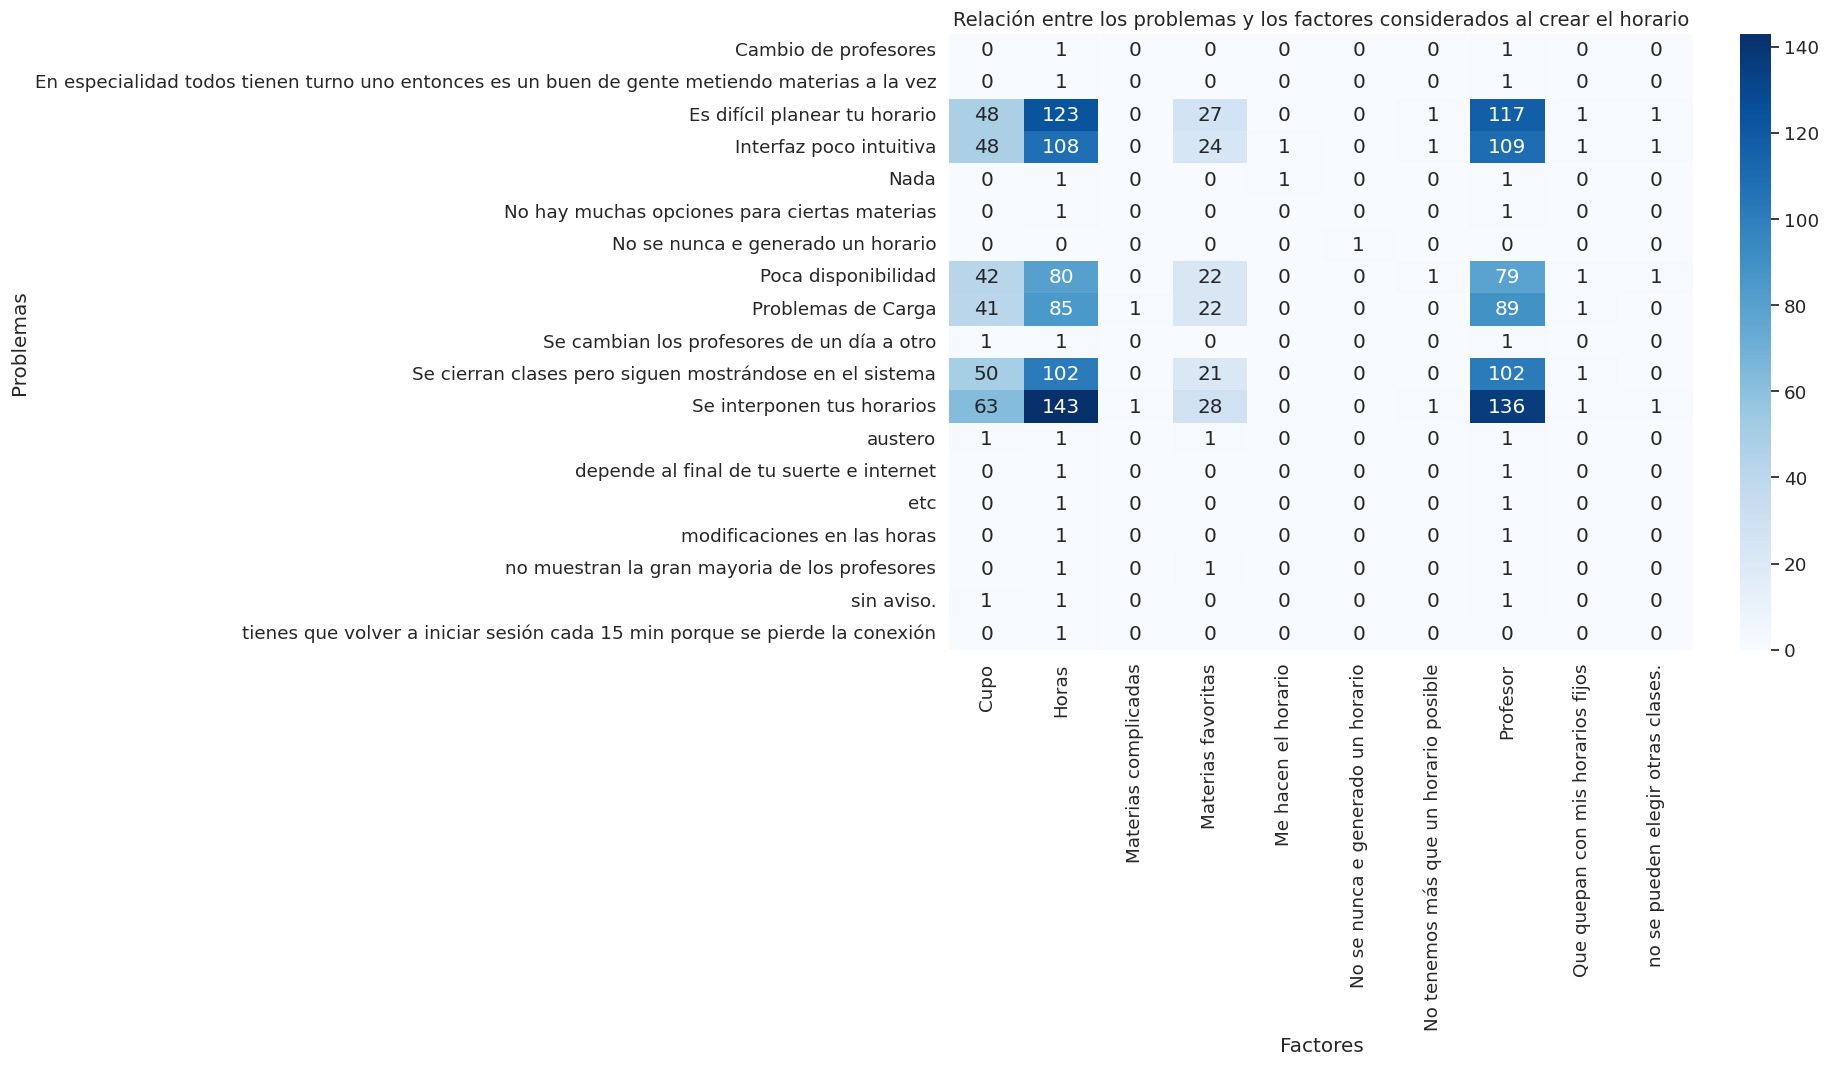

In [74]:
df_filtered = df.dropna(subset=["¿Qué problemas has tenido?", 
                                "¿Qué factores tomas en consideración al crear tu horario?"])

df_filtered["problems_list"] = df_filtered["¿Qué problemas has tenido?"].apply(
    lambda x: [p.strip() for p in x.split(",") if p.strip() != ""]
)
df_filtered["factors_list"] = df_filtered["¿Qué factores tomas en consideración al crear tu horario?"].apply(
    lambda x: [f.strip() for f in x.split(",") if f.strip() != ""]
)

from collections import defaultdict

co_occurrences = defaultdict(int)

for _, row in df_filtered.iterrows():
    problems = row["problems_list"]
    factors = row["factors_list"]
    for p in problems:
        for f in factors:
            co_occurrences[(p, f)] += 1

cooc_data = [(p, f, count) for (p, f), count in co_occurrences.items()]
df_cooc = pd.DataFrame(cooc_data, columns=["Problem", "Factor", "Count"])

pivot_cooc = df_cooc.pivot(index="Problem", columns="Factor", values="Count").fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_cooc, annot=True, fmt=".0f", cmap="Blues")
plt.title("Relación entre los problemas y los factores considerados al crear el horario", fontsize=14)
plt.xlabel("Factores")
plt.ylabel("Problemas")
plt.show()